In [103]:
#import the required libralies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

In [104]:
#read the file
dset=pd.read_csv('01Exercise1.csv')
dsets=dset.copy()

In [105]:
# Prelim Analysis and Feature selection 
dsets.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [106]:
dsets=dsets.dropna()

In [107]:
dsets=dsets.drop(['gender'],axis=1)

In [108]:
dsets=pd.get_dummies(dsets,drop_first=True)

In [109]:
dsets

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,1,0
2,1.0,3000,66.0,1,1
3,1.0,2583,120.0,1,1
4,1.0,6000,141.0,0,1
5,1.0,5417,267.0,1,1
...,...,...,...,...,...
609,1.0,2900,71.0,0,1
610,1.0,4106,40.0,1,1
611,1.0,8072,253.0,1,1
612,1.0,7583,187.0,1,1


In [110]:
#normalization using Z transformation method
Scaler_=StandardScaler()
dsets['income']=Scaler_.fit_transform(dsets[['income']])
dsets['loanamt']=Scaler_.fit_transform(dsets[['loanamt']])

dsets

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,0
2,1.0,-0.392077,-0.971015,1,1
3,1.0,-0.461621,-0.294478,1,1
4,1.0,0.108246,-0.031380,0,1
5,1.0,0.011017,1.547205,1,1
...,...,...,...,...,...
609,1.0,-0.408754,-0.908372,0,1
610,1.0,-0.207624,-1.296754,1,1
611,1.0,0.453802,1.371807,1,1
612,1.0,0.372249,0.544929,1,1


In [111]:
# Create Train and test split


In [112]:
Y=dsets['status_Y']
X=dsets.drop(['status_Y'],axis=1)

In [113]:
X,Y

(      ch    income   loanamt  married_Yes
 1    1.0 -0.128073 -0.194250            1
 2    1.0 -0.392077 -0.971015            1
 3    1.0 -0.461621 -0.294478            1
 4    1.0  0.108246 -0.031380            0
 5    1.0  0.011017  1.547205            1
 ..   ...       ...       ...          ...
 609  1.0 -0.408754 -0.908372            0
 610  1.0 -0.207624 -1.296754            1
 611  1.0  0.453802  1.371807            1
 612  1.0  0.372249  0.544929            1
 613  0.0 -0.128073 -0.131608            0
 
 [529 rows x 4 columns],
 1      0
 2      1
 3      1
 4      1
 5      1
       ..
 609    1
 610    1
 611    1
 612    1
 613    0
 Name: status_Y, Length: 529, dtype: uint8)

In [114]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1234,stratify=Y)

In [115]:
# Fit the model
# Logistic Regression
st=LogisticRegression()
st.fit(X_train,Y_train)

LogisticRegression()

In [116]:
# Create Y Predictions
Y_predict=st.predict(X_test)

In [117]:
Y_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

In [118]:
#create confusion matrix

In [119]:
sp=confusion_matrix(Y_test,Y_predict)

In [120]:
sp

array([[ 29,  20],
       [  2, 108]], dtype=int64)

In [121]:
x_score=st.score(X_test,Y_test)

In [122]:
x_score

0.8616352201257862

In [123]:
cr1=classification_report(Y_test,Y_predict)
print(cr1)

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159



In [124]:
as1=accuracy_score(Y_test,Y_predict)
as1

0.8616352201257862

In [125]:
y_prop=st.predict_proba(X_test)[:,1]
threshold=0.8
arr1=[]
for i in range(0,len(y_prop)):
    if y_prop[i]>threshold:
        arr1.append(1)
    else:
        arr1.append(0)
arr1

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [126]:
cm3=confusion_matrix(Y_test,arr1)
cm3

array([[46,  3],
       [60, 50]], dtype=int64)

In [127]:
score2=accuracy_score(Y_test,arr1)
score2
csr2=classification_report(Y_test,arr1)
print(csr2)

              precision    recall  f1-score   support

           0       0.43      0.94      0.59        49
           1       0.94      0.45      0.61       110

    accuracy                           0.60       159
   macro avg       0.69      0.70      0.60       159
weighted avg       0.79      0.60      0.61       159



In [128]:
fpr,tpr,threshold=roc_curve(Y_test,y_prop)

In [129]:
AUC=roc_auc_score(Y_test,y_prop)

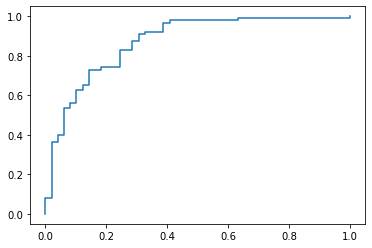

In [131]:
plt.plot(fpr,tpr)
plt.show()
